In [1]:
!pip install transformers

In [2]:
import tensorflow as tf### models

In [3]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.1 MB/s eta 0:00:00


In [4]:
CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE": 48,
    "LEARNING_RATE": 5e-5,
    "N_EPOCHS": 5,
    "DROPOUT_RATE": 0.0,
    "REGULARIZATION_RATE": 0.0,
    "N_FILTERS": 6,
    "KERNEL_SIZE": 3,
    "N_STRIDES": 1,
    "POOL_SIZE": 2,
    "N_DENSE_1": 1024,
    "N_DENSE_2": 128,
    "NUM_CLASSES": 7,
    "PATCH_SIZE": 16,
    "PROJ_DIM": 768,
    "CLASS_NAMES": ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
}

In [ ]:
# train_directory = "/content/dataset/Emotions Dataset/Emotions Dataset/train"
# val_directory = "/content/dataset/Emotions Dataset/Emotions Dataset/test"

In [ ]:
# !pip install -q kaggle

In [ ]:
# ! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# ! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
# !chmod 600 /root/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# !kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes

 99% 307M/309M [00:05<00:00, 55.5MB/s]
100% 309M/309M [00:05<00:00, 60.8MB/s]


In [ ]:
# !unzip "/content/human-emotions-datasethes.zip" -d "/content/dataset/"

unzip:  cannot find or open /content/human-emotions-datasethes.zip, /content/human-emotions-datasethes.zip.zip or /content/human-emotions-datasethes.zip.ZIP.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!unzip -o "/content/drive/My Drive/archive.zip" -d "/content/drive/My Drive/Emotions Dataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/Emotions Dataset/train/sad/Training_65242339.jpg  
  inflating: /content/drive/My Drive/Emotions Dataset/train/sad/Training_65267116.jpg  
  inflating: /content/drive/My Drive/Emotions Dataset/train/sad/Training_65275626.jpg  
  inflating: /content/drive/My Drive/Emotions Dataset/train/sad/Training_6529266.jpg  
  inflating: /content/drive/My Drive/Emotions Dataset/train/sad/Training_65329617.jpg  
  inflating: /content/drive/My Drive/Emotions Dataset/train/sad/Training_65338712.jpg  
  inflating: /content/drive/My Drive/Emotions Dataset/train/sad/Training_65338797.jpg  
  inflating: /content/drive/My Drive/Emotions Dataset/train/sad/Training_65387162.jpg  
  inflating: /content/drive/My Drive/Emotions Dataset/train/sad/Training_65404494.jpg  
  inflating: /content/drive/My Drive/Emotions Dataset/train/sad/Training_65426218.jpg  
  inflating: /content/drive/My Drive/Emotions Dataset/train/sad/Traini

In [7]:
train_directory = "/content/drive/My Drive/Emotions Dataset/train"
val_directory = "/content/drive/My Drive/Emotions Dataset/test"

In [8]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,  # Directory path containing image files
    labels='inferred', # How to infer labels; 'inferred' infers from the directory structure
    label_mode='categorical', # Type of labels; 'categorical' means one-hot encoded labels
    class_names=CONFIGURATION["CLASS_NAMES"], # List of class names for the categorical labels
    color_mode='rgb', # Color mode for the images; 'rgb' for color images
    batch_size=CONFIGURATION["BATCH_SIZE"], # Batch size for training
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]), # Size to which images are resized
    shuffle=True, # Whether to shuffle the dataset
    seed=99,  # Seed for reproducibility
)

Found 28709 files belonging to 7 classes.


In [9]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=1,#CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,
)

Found 7178 files belonging to 7 classes.


In [10]:
import matplotlib.pyplot as plt### plotting bar chart

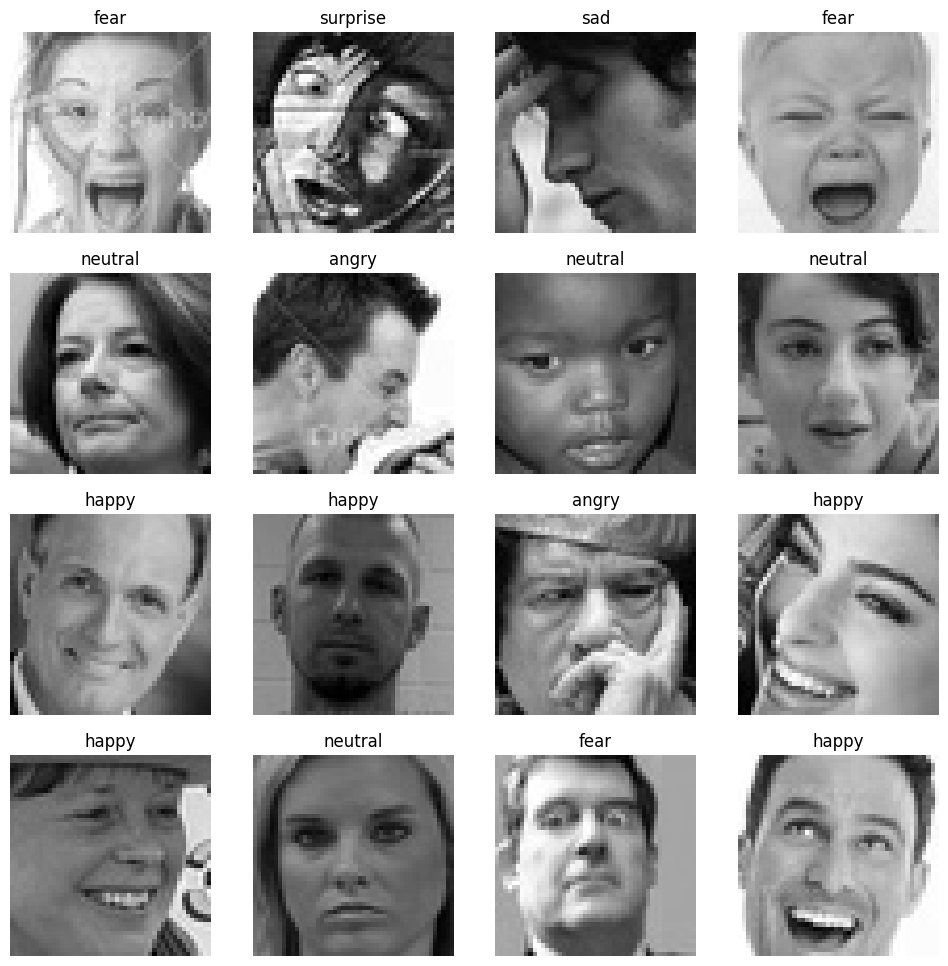

In [11]:
plt.figure(figsize = (12,12))

for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)
    plt.title(CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis = 0).numpy()])
    plt.axis("off")

In [12]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import time
import random
from google.colab import files
from PIL import Image
import albumentations as A
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
import matplotlib.cm as cm
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (GlobalAveragePooling2D, Activation, MaxPooling2D, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, Embedding, Permute,
                                     Dropout, RandomFlip, RandomRotation, LayerNormalization, MultiHeadAttention,
                                     RandomContrast, Rescaling, Resizing, Reshape)
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (Callback, CSVLogger, EarlyStopping, LearningRateScheduler,
                                        ModelCheckpoint, ReduceLROnPlateau)
from tensorflow.keras.regularizers  import L2, L1
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Example, Features, Feature
from google.colab import drive

In [13]:
### tf.keras.layer augment
augment_layers = tf.keras.Sequential([
  RandomRotation(factor = (-0.025, 0.025)),
  RandomFlip(mode='horizontal',),
  RandomContrast(factor=0.1),
])

In [14]:
def augment_layer(image, label):
  return augment_layers(image, training = True), label

In [15]:
training_dataset = (
    train_dataset
    .map(augment_layer, num_parallel_calls = tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)

In [16]:
validation_dataset = (
    val_dataset
    .prefetch(tf.data.AUTOTUNE)
)

In [17]:
resize_rescale_layers = tf.keras.Sequential([
       Resizing(224, 224, interpolation='bilinear'),
       Rescaling(1./255),
       Permute((3,1,2))
])

In [18]:
from transformers import ViTModel,ViTConfig

In [19]:
config = ViTConfig()

In [20]:
model = ViTModel(config)
# vit_model.get_layer("vit").pooler.trainable = False

In [21]:
from transformers import ViTFeatureExtractor, TFViTModel
from datasets import load_dataset
import tensorflow as tf
hgmodel = TFViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
inputs = tf.keras.Input(shape=(48,48,3))
#hgmodel.trainable = False
x = resize_rescale_layers(inputs)
x = hgmodel.vit(x)[0][:,0,:]
mlp_output_dense_layer=Dense(CONFIGURATION['NUM_CLASSES'],activation='softmax')(x)
final_model = tf.keras.Model(inputs=inputs,outputs=mlp_output_dense_layer)

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/346M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFViTModel.

All the layers of TFViTModel were initialized from the model checkpoint at google/vit-base-patch16-224-in21k.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTModel for predictions without further training.


In [ ]:
# img_path = "/content/drive/My Drive/Emotions Dataset/train/happy/Training_169588.jpg"
# test_image = cv2.imread(img_path)
# test_image = cv2.resize(test_image, (CONFIGURATION["IM_SIZE"] ,CONFIGURATION["IM_SIZE"]))
# #test_image = tf.Variable(test_image)

In [ ]:
# final_model(tf.expand_dims(test_image,axis=0))

<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[0.11758837, 0.1681035 , 0.23991516, 0.08053931, 0.11936463,
        0.13361372, 0.14087527]], dtype=float32)>

In [ ]:
# final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 sequential_1 (Sequential)   (None, 3, 224, 224)       0         
                                                                 
 vit (TFViTMainLayer)        TFBaseModelOutputWithPo   86389248  
                             oling(last_hidden_state             
                             =(None, 197, 768),                  
                              pooler_output=(None, 7             
                             68),                                
                              hidden_states=None, at             
                             tentions=None)                      
                                                                 
 tf.__operators__.getitem (  (None, 768)               0     

In [22]:
loss_function = CategoricalCrossentropy()
metrics = [CategoricalAccuracy(name = "accuracy"), TopKCategoricalAccuracy(k=2, name = "top_k_accuracy")]
final_model.compile(
  optimizer = Adam(learning_rate = CONFIGURATION["LEARNING_RATE"]),
  loss = loss_function,
  metrics = metrics,
)

In [23]:
history = final_model.fit(
  training_dataset,
  #validation_data = validation_dataset,
  epochs = CONFIGURATION["N_EPOCHS"],
  verbose = 1,
  #class_weight = class_weights,
  #callbacks = [WandbCallback(), LogConfMatrix(), LogResultsTable()]
)

Epoch 1/5


898/898 [==============================] - 1150s 1s/step - loss: 1.0708 - accuracy: 0.5969 - top_k_accuracy: 0.7891
Epoch 2/5
898/898 [==============================] - 1109s 1s/step - loss: 0.8252 - accuracy: 0.6948 - top_k_accuracy: 0.8684
Epoch 3/5
898/898 [==============================] - 1109s 1s/step - loss: 0.6720 - accuracy: 0.7589 - top_k_accuracy: 0.9066
Epoch 4/5
898/898 [==============================] - 1109s 1s/step - loss: 0.5138 - accuracy: 0.8210 - top_k_accuracy: 0.9371
Epoch 5/5
898/898 [==============================] - 1109s 1s/step - loss: 0.3780 - accuracy: 0.8712 - top_k_accuracy: 0.9620


In [25]:
print(history.history)

{'loss': [1.0708469152450562, 0.8251953721046448, 0.6720370054244995, 0.5138394832611084, 0.378034383058548], 'accuracy': [0.5968511700630188, 0.694799542427063, 0.7588561177253723, 0.8209620714187622, 0.8712250590324402], 'top_k_accuracy': [0.789125382900238, 0.8684036135673523, 0.9066146612167358, 0.9370929002761841, 0.9620327949523926]}


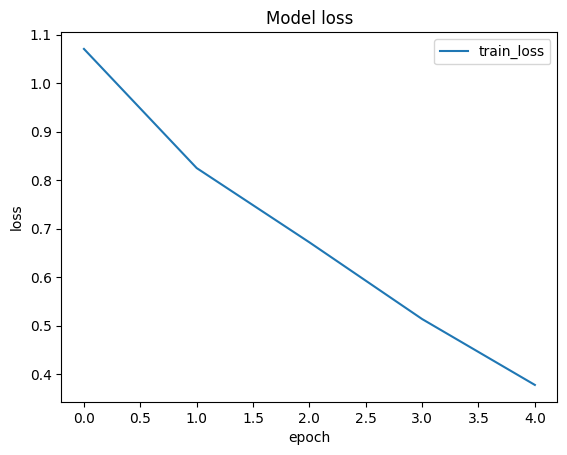

In [26]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

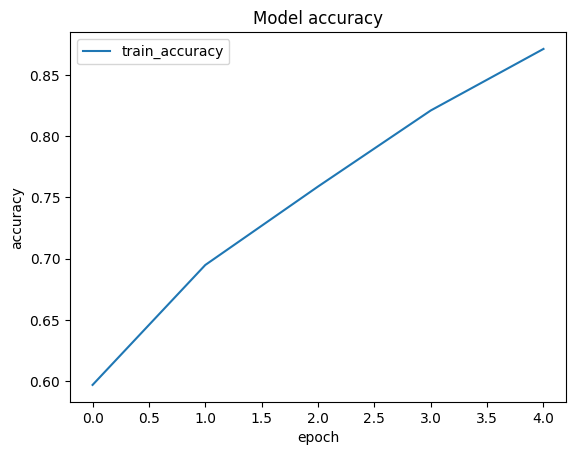

In [27]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [28]:
final_model.save("trained_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
final_model.save_weights("pretrained.weights.h5")

In [30]:
final_model_test = tf.keras.Model(inputs=inputs,outputs=mlp_output_dense_layer)

In [31]:
final_model_test.load_weights("pretrained.weights.h5", by_name=True)
#final_model_test.load_weights("pretrained.weights.h5")

In [32]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [33]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [34]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [35]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  (x,y,w,h) = faces[0]
  print(x,y,w,h)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  crop = gray[y:y+h, x:x+w]
  #cv2.imshow('Image', crop)
  cv2.imwrite(filename, crop)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
286 211 167 167
Saved to photo.jpg


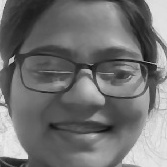

In [108]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [109]:
dict = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'neutral', 5:'sad', 6:'surprise'}

img_path = "photo.jpg"
test_image = cv2.imread(img_path)
test_image = cv2.resize(test_image, (CONFIGURATION["IM_SIZE"] ,CONFIGURATION["IM_SIZE"]))
result = final_model_test.predict(tf.expand_dims(test_image,axis=0))
print(result)
print(dict[np.argmax(result,axis=1)[0]])

1/1 [==============================] - 0s 85ms/step
[[2.9616267e-04 3.9345119e-04 4.1289913e-04 9.8981714e-01 8.3349757e-03
  2.2961845e-04 5.1582477e-04]]
happy


In [ ]:
!cp -r "pretrained.weights.h5" "/content/drive/My Drive/"

In [ ]:
[]